In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load the dataset
df = pd.read_csv('airplane_price_dataset.csv')

# Display the first few rows
df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [13]:
df.columns

Index(['Model', 'Üretim Yılı', 'Motor Sayısı', 'Motor Türü', 'Kapasite',
       'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)',
       'Yaş', 'Satış Bölgesi', 'Fiyat ($)'],
      dtype='object')

In [15]:
df.shape

(12377, 11)

In [27]:
# Check for missing values
df.isnull().sum()

Model                         0
Üretim Yılı                   0
Motor Sayısı                  0
Motor Türü                    0
Kapasite                      0
Menzil (km)                   0
Yakıt Tüketimi (L/saat)       0
Saatlik Bakım Maliyeti ($)    0
Yaş                           0
Satış Bölgesi                 0
Fiyat ($)                     0
dtype: int64

In [29]:
# Get basic statistics
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


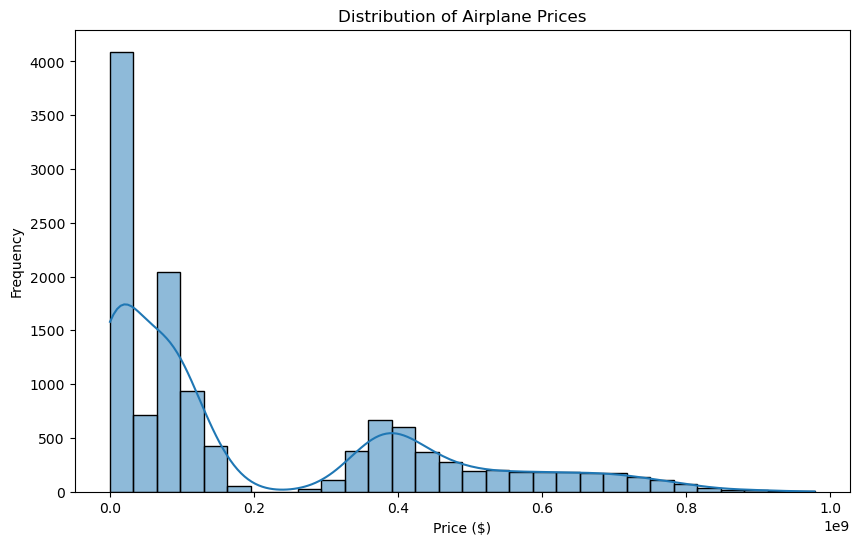

In [23]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Fiyat ($)'], bins=30, kde=True)
plt.title('Distribution of Airplane Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

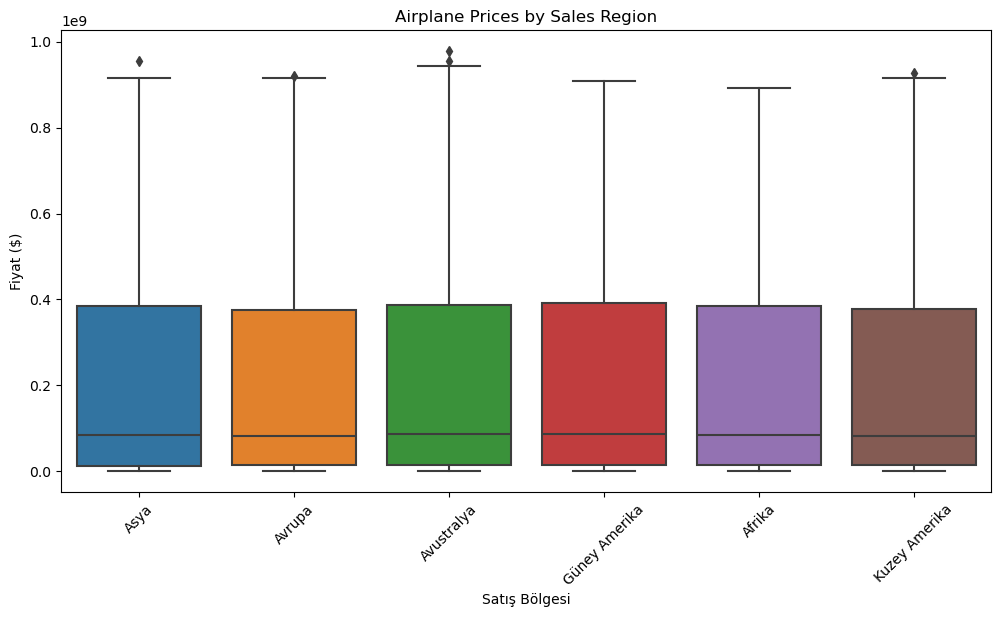

In [31]:
# Boxplot of prices by sales region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Satış Bölgesi', y='Fiyat ($)', data=df)
plt.title('Airplane Prices by Sales Region')
plt.xticks(rotation=45)
plt.show()

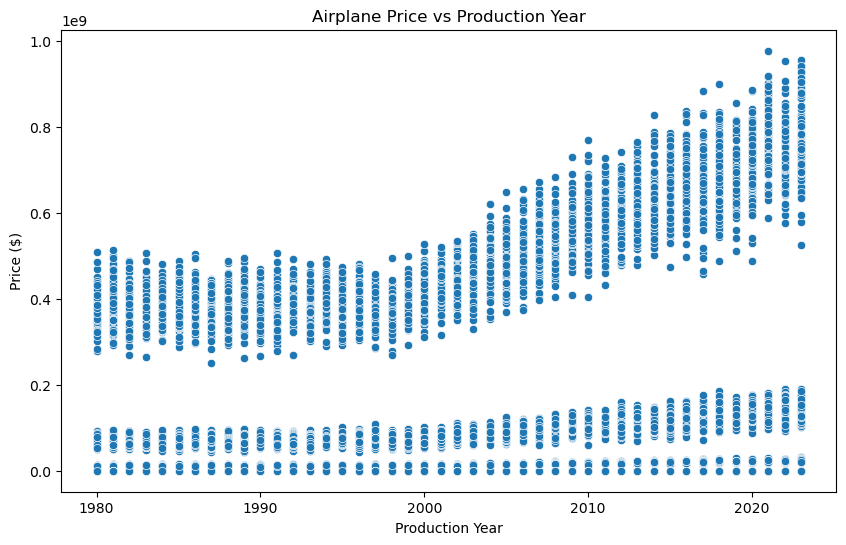

In [33]:
# Scatter plot of production year vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Üretim Yılı', y='Fiyat ($)', data=df)
plt.title('Airplane Price vs Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price ($)')
plt.show()

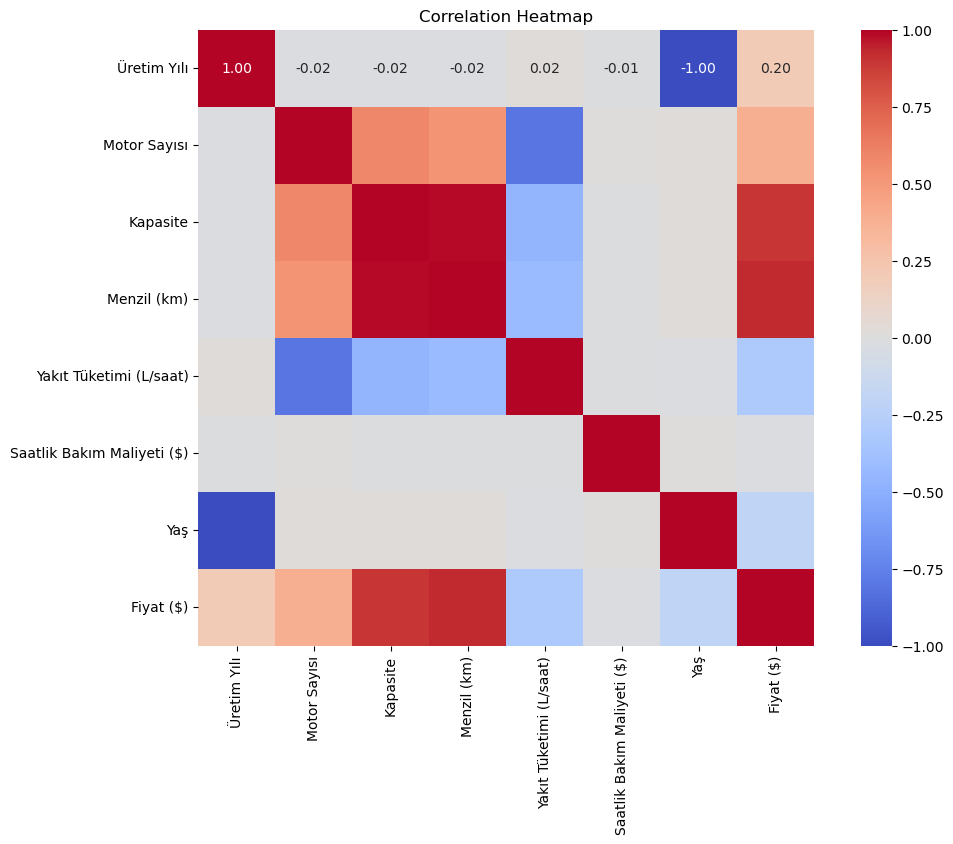

In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()